In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("/content/sample_data/spam_final_df.data")



In [ ]:

df =data
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
 word_freq_free               0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# **Data Exploration**

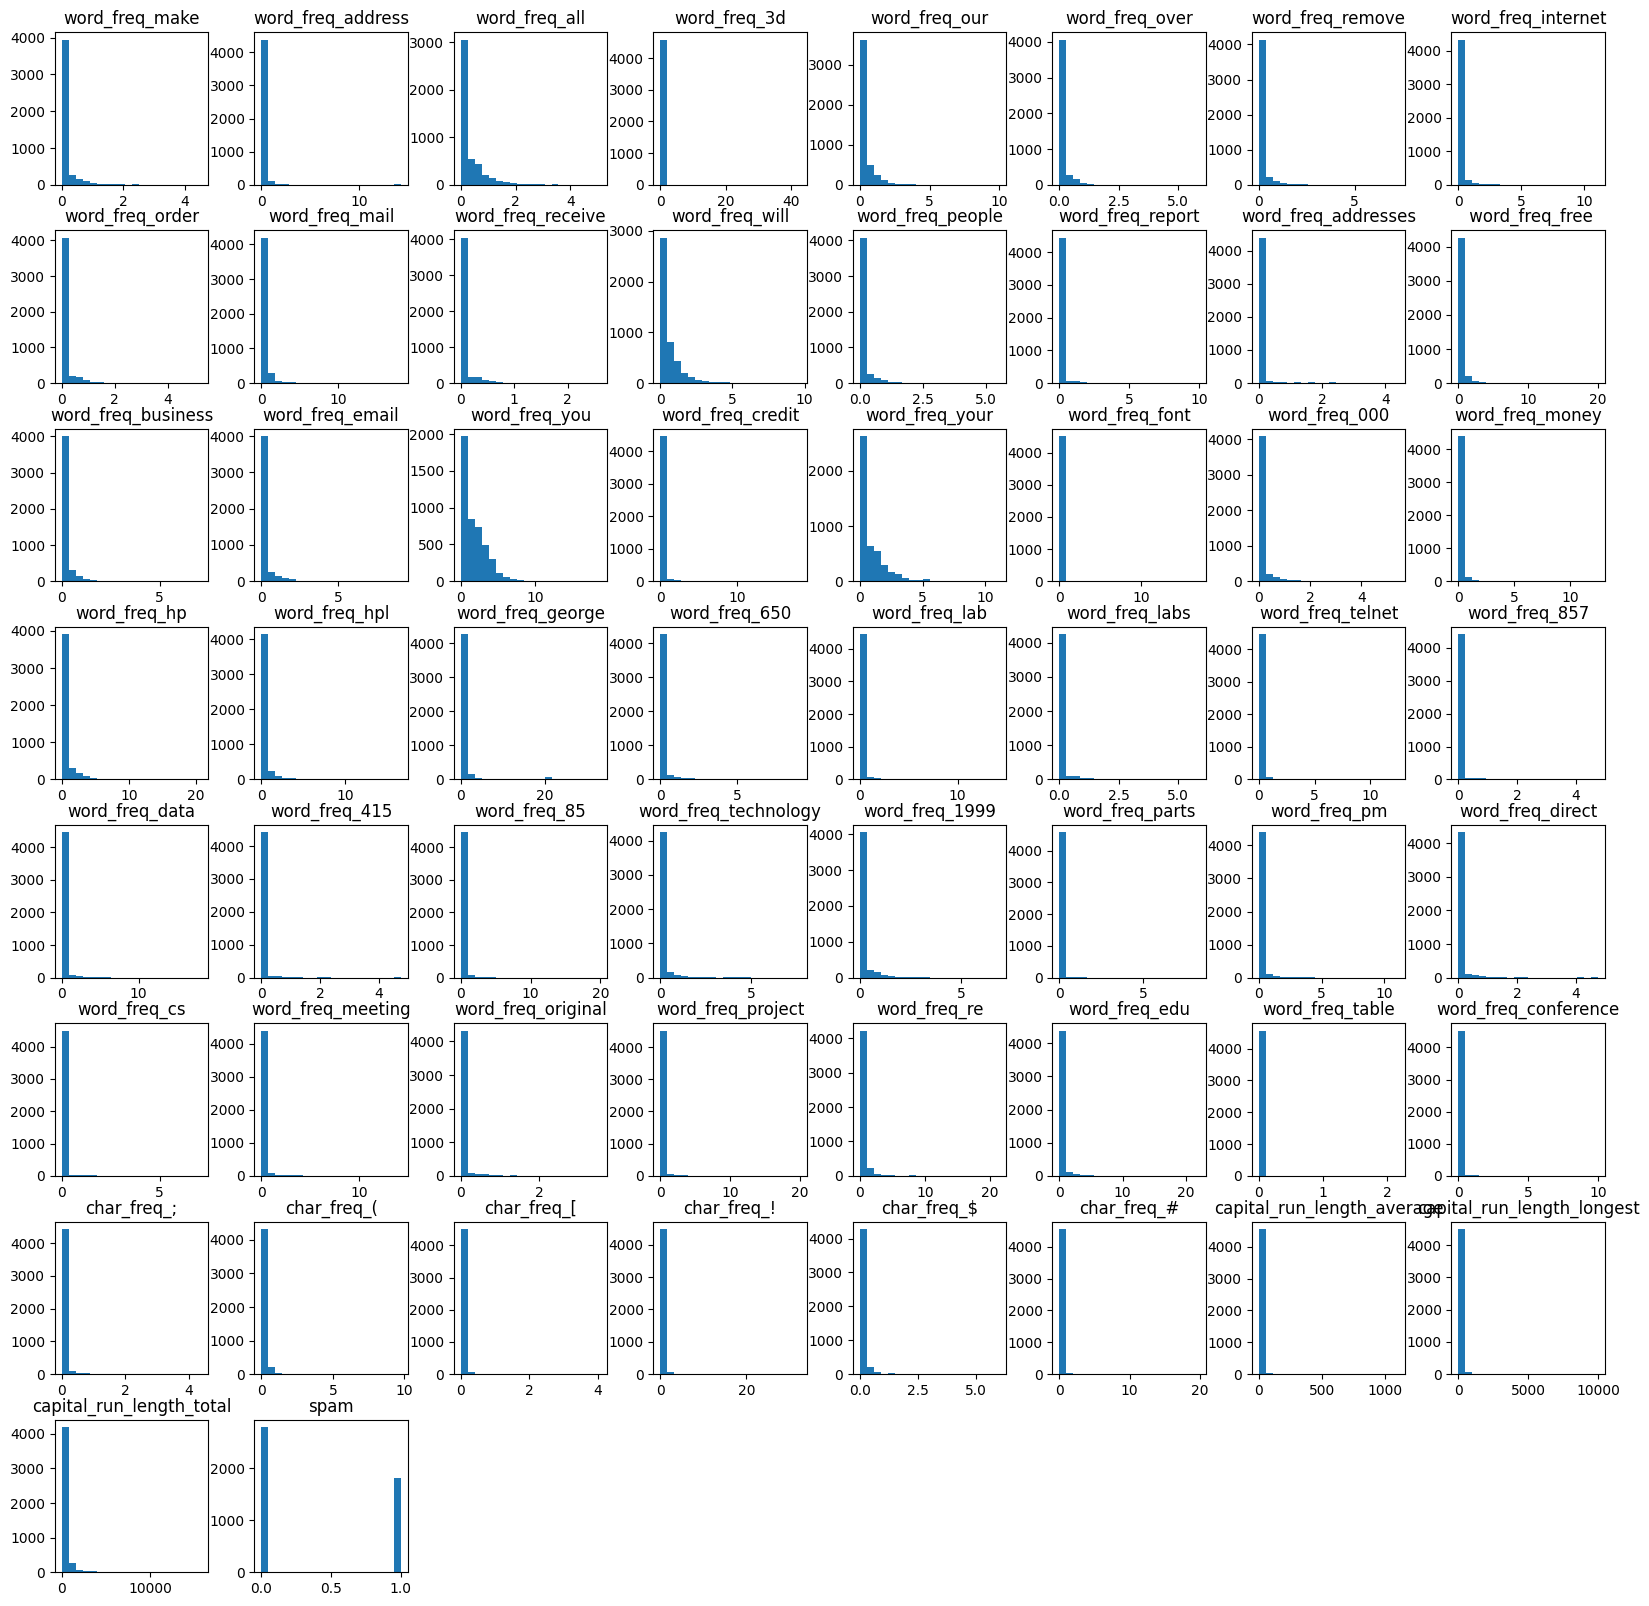

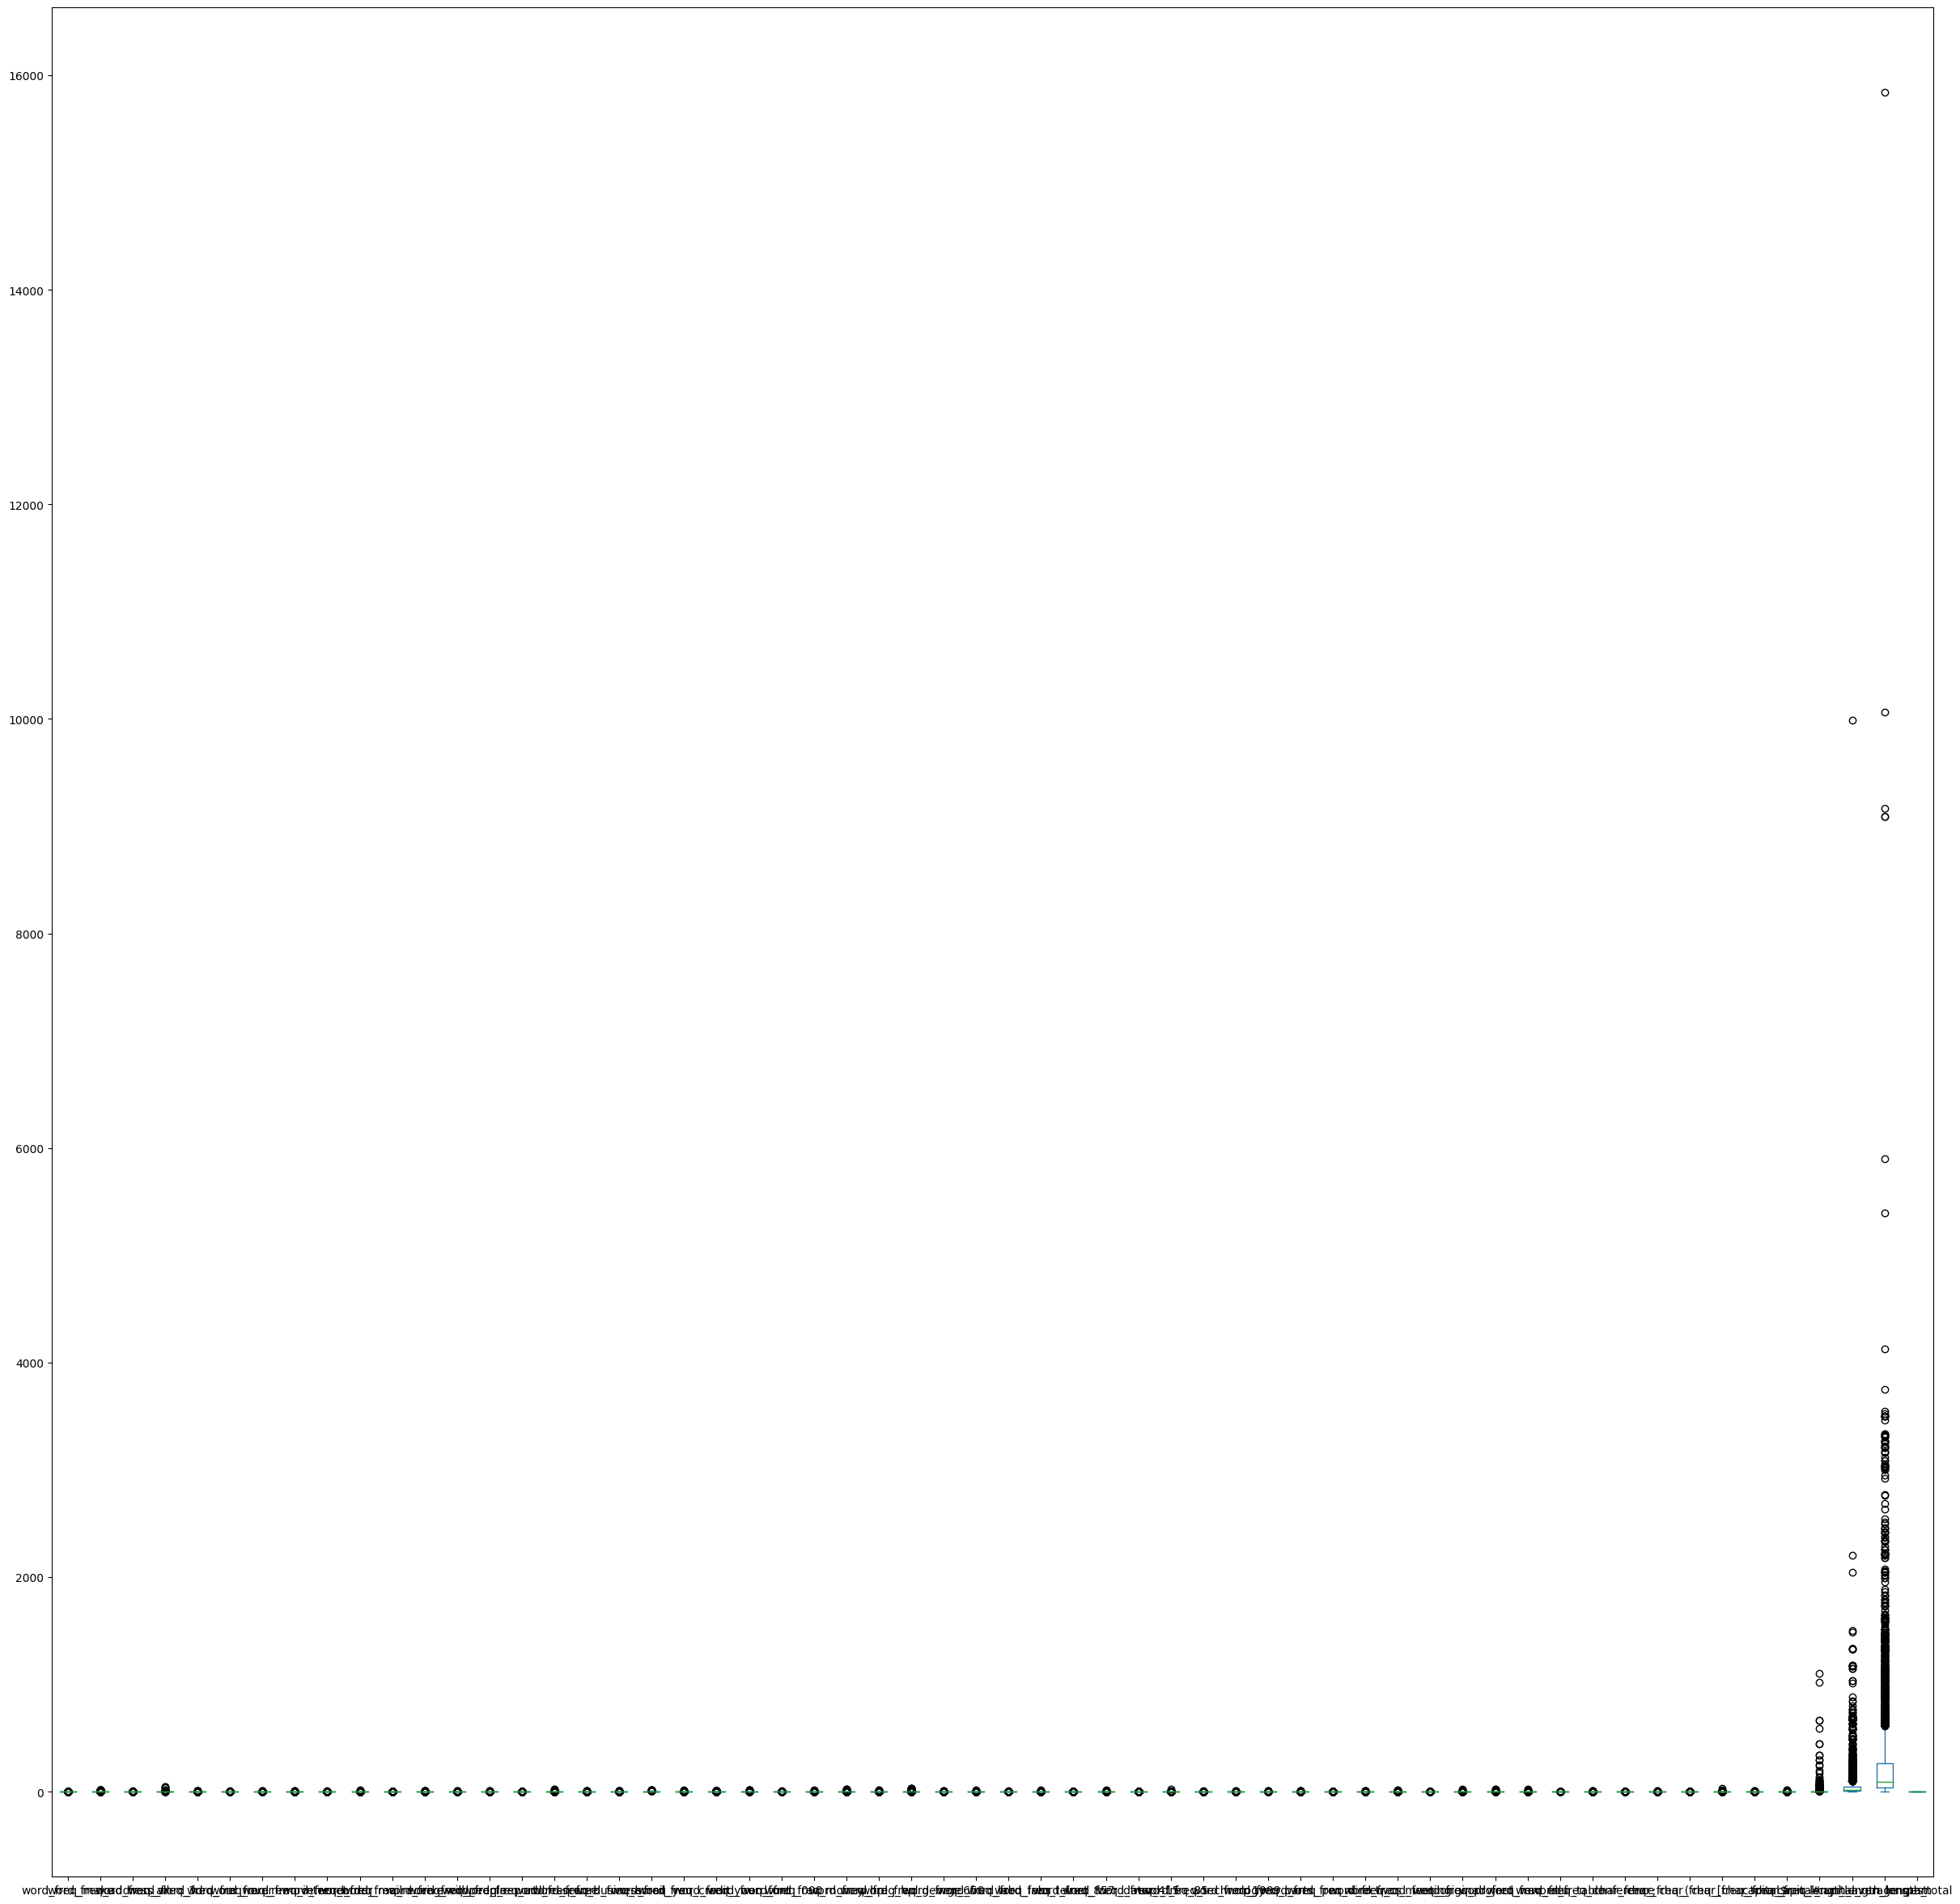

In [ ]:
df = data
# Plot histograms for each input feature
df.hist(figsize=(20,20), grid=False, bins=20)
plt.show()

# Plot boxplots for each input feature
df.plot(kind='box', figsize=(30,30))
plt.show()


In [ ]:
# Create an interactive box plot for each input feature using Plotly
fig = go.Figure()

for col in df.columns:
    fig.add_trace(go.Box(y=df[col], name=col))

fig.update_layout(height=800, width=1200, title="Box Plots of Input Features")
fig.show()


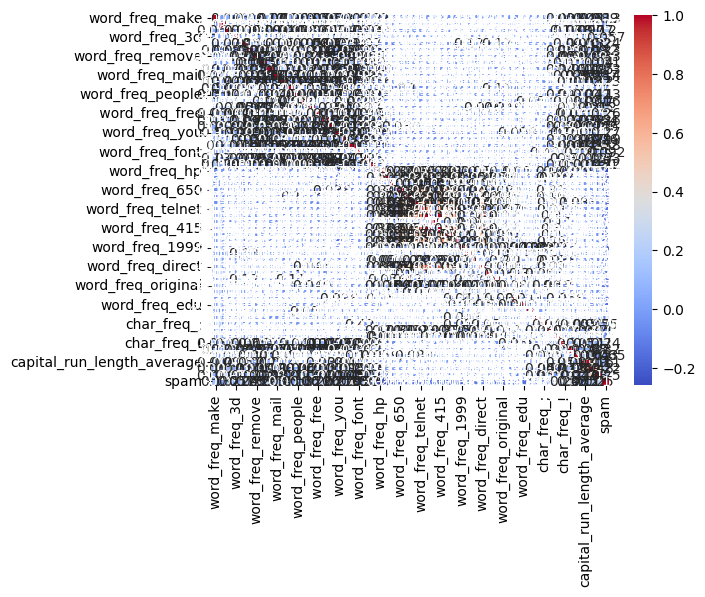

In [ ]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# **Transforming the data and Splitting the data into test and train:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=26)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Random Forest Classifier:**

In [ ]:
# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=300, random_state=26,max_features= 'sqrt')
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

In [ ]:
# Evaluate the model
print('Evaluation of the model performace of Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


Evaluation of the model performace of Random Forest Classifier
Accuracy: 0.9576547231270358
Precision: 0.9740634005763689
Recall: 0.9184782608695652
F1-score: 0.9454545454545454


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=26,
#                            shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [300],
    'max_features': [ 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_features': 'log2', 'n_estimators': 300}

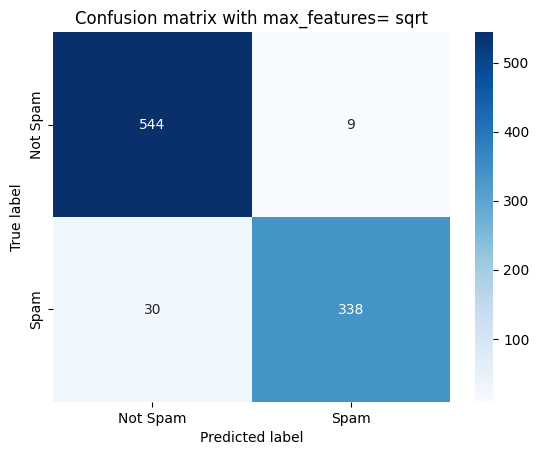

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion matrix with max_features= sqrt')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**KNN Neighbor Classifiers**

In [ ]:
# Train a KNN Neighbor classifier
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train )
y_pred=knn_model.predict(X_test)
y_pred

In [ ]:
# Evaluate the model
print('Evaluation of the model performace of KNN Neighbor classifier for n=7')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))


Evaluation of the model performace of KNN Neighbor classifier for n=7
Accuracy: 0.9163952225841476
Precision: 0.9169054441260746
Recall: 0.8695652173913043
F1-score: 0.8926080892608089


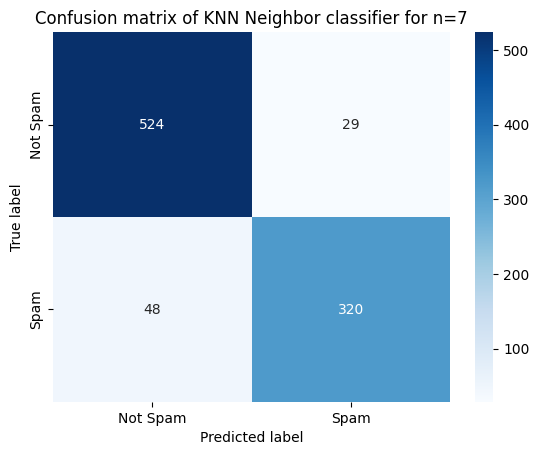

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion matrix of KNN Neighbor classifier for n=7')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Naive Bayes classifier:**

In [ ]:
# Train a Naive Bayes classifier
naive = GaussianNB()
naive.fit(X_train,y_train )

y_pred = naive.predict(X_test)

In [ ]:
# Evaluate the model
print('Evaluation of the model performace of Naive Bayes classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Evaluation of the model performace of Naive Bayes classifier
Accuracy: 0.8349619978284474
Precision: 0.7213114754098361
Recall: 0.9565217391304348
F1-score: 0.822429906542056


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA

# pipe = Pipeline(steps=[
#                     ('pca', PCA()),
#                     ('estimator', GaussianNB()),
#                     ])
    
# parameters = {'estimator__var_smoothing': [1e-11, 1e-10, 1e-9]}
# Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(X_train, y_train)
# print(Bayes.best_estimator_)
# print('best score:')
# print(Bayes.best_score_)
# predictions = Bayes.best_estimator_.predict(X_test)

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=1e-11))])
best score:
0.7108695652173913


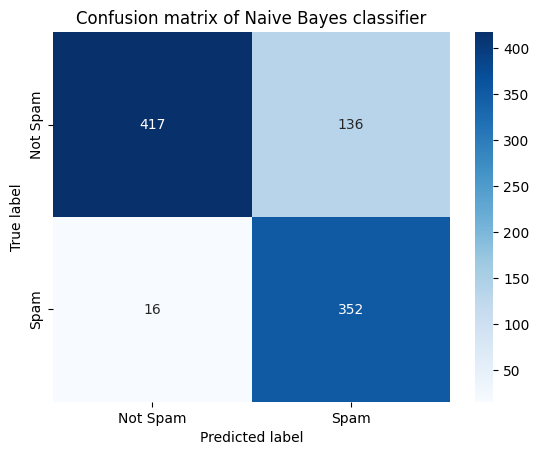

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion matrix of Naive Bayes classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Accuracy: 0.9402823018458197
Precision: 0.943342776203966
Recall: 0.904891304347826
F1-score: 0.9237170596393898
Best parameters: {'C': 1}
Best F1-score: 0.8942886395204566


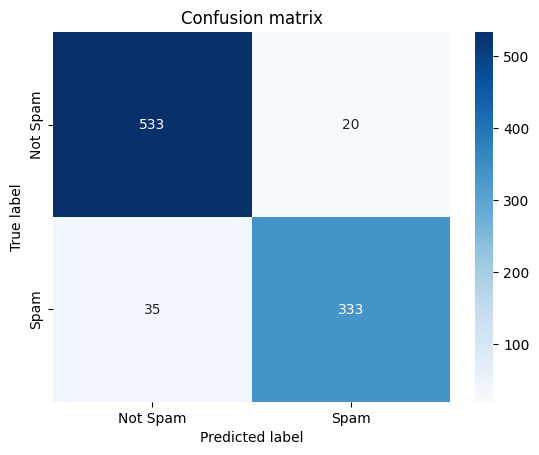

In [ ]:
# LogisticRegression

lr = LogisticRegression(random_state=26)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
print('Best F1-score:', grid_search.best_score_)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
